In [3]:
#ACTUAL MODEL CODE
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split

In [2]:


data = np.loadtxt(open("train_2008.csv", "rb"), delimiter=",", skiprows=1)
test_data = np.loadtxt(open("test_2008.csv", "rb"), delimiter=",", skiprows=1)

X = data[:, 3:382]
y = data[:, 382]

X_test = test_data[:, 3:382]

clf = RandomForestClassifier(n_estimators = 190, min_samples_leaf = 20)
clf.fit(X, y)



results = clf.predict_proba(X_test)

new_results = results[:, 1]

with open('output_1.csv', 'w') as output:
    output.write('id,target\n')
    for i in range(len(test_data)):
        output.write(str(int(test_data[i][0])) + ',' + str(results[i]) + '\n')


KeyboardInterrupt: 

In [11]:
results = clf.predict_proba(X_test)

new_results = results[:, 1]

with open('output_1.csv', 'w') as output:
    output.write('id,target\n')
    for i in range(len(test_data)):
        output.write(str(int(test_data[i][0])) + ',' + str(new_results[i]) + '\n')


#print(test_data)

In [10]:
print(results)

[[0.4983719  0.5016281 ]
 [0.8749574  0.1250426 ]
 [0.87851596 0.12148404]
 ...
 [0.76835058 0.23164942]
 [0.89935267 0.10064733]
 [0.74997946 0.25002054]]


In [2]:
from auto_ml import Predictor
from auto_ml.utils import get_boston_dataset

df_train, df_test = get_boston_dataset()

column_descriptions = {
    'MEDV': 'output'
    , 'CHAS': 'categorical'
}

ml_predictor = Predictor(type_of_estimator='regressor', column_descriptions=column_descriptions)

ml_predictor.train(df_train)

ml_predictor.score(df_test, df_test.MEDV)

ModuleNotFoundError: No module named 'auto_ml'

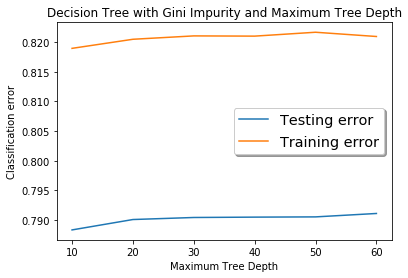

In [8]:
test_errors = np.array([.788315, .790069, .790413, .790473, .790514,.791090])
training_errors = np.array([.818969, .820502, .821072, .821033, .821689, .820971])
max_depth = np.array([10,20,30,40,50,60])

plt.figure()
plt.plot(max_depth, test_errors, label='Testing error')
plt.plot(max_depth, training_errors, label='Training error')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Classification error')
plt.title('Decision Tree with Gini Impurity and Maximum Tree Depth')
plt.legend(loc=0, shadow=True, fontsize='x-large')
plt.show()

In [ ]:
# adaboost estimator fixed at 190, varying rf estimators (10,200,10)
[0.7883151610651119, 0.7900699975215729, 0.7904129335962449, 0.790473277095442, 0.7905142769250366, 0.7910907432790981, 0.7906949324241872, 0.7913765545911948]
[0.8189695954586359, 0.8205024285110467, 0.8210728984421682, 0.8210331034313989, 0.8216895351511003, 0.8209717451645343, 0.8212074926738158, 0.8213789892363224]

In [ ]:
# rf estimator fixed at 190, varying adaboost estimators (10,200,10)
[0.7743610628118328, 0.782699215656385, 0.7863811066035257, 0.7876867886767847, 0.7886351597351172, 0.7892909070096676, 0.7898131235892051]
[0.7767236848904046, 0.7869713783412366, 0.7924294245431281, 0.7960312203361333, 0.798986114510666, 0.8013124824714912, 0.8034792610848702]

In [ ]:
# rf estimator fixed at 190, varying adaboost estimators (150,220,10)
[0.7910013374006912, 0.7913798358275573, 0.790945462632921, 0.7913151798462836, 0.7909613063170706, 0.7909374001664305]
[0.8165327645136072, 0.8179251412299803, 0.8189735133672766, 0.8204579934055635, 0.8215260711868219, 0.8227959478285066]